In [2]:
import warnings

warnings.filterwarnings('ignore')

import keras
keras.__version__

'2.2.0'

In [3]:
from keras.layers import SimpleRNN

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6457 - acc: 0.6097 - val_loss: 0.6672 - val_acc: 0.5776
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.4317 - acc: 0.8132 - val_loss: 0.3783 - val_acc: 0.8436
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.3071 - acc: 0.8778 - val_loss: 0.3594 - val_acc: 0.8472
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2360 - acc: 0.9094 - val_loss: 0.3995 - val_acc: 0.8252
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1786 - acc: 0.9331 - val_loss: 0.4698 - val_acc: 0.8360
Epoch 6/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1223 - acc: 0.9579 - val_loss: 0.3951 - val_acc: 0.8466
Epoch 7/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.0815 - acc: 0.9734 - val_loss: 0.4578 - val_acc:

In [10]:
import matplotlib.pyplot as plt

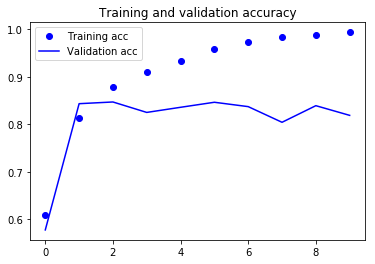

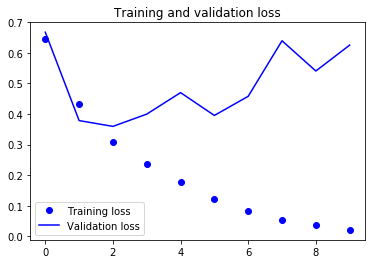

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.5077 - acc: 0.7626 - val_loss: 0.4095 - val_acc: 0.8268
Epoch 2/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.2912 - acc: 0.8863 - val_loss: 0.2872 - val_acc: 0.8814
Epoch 3/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.2351 - acc: 0.9099 - val_loss: 0.2946 - val_acc: 0.8884
Epoch 4/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1996 - acc: 0.9277 - val_loss: 0.4600 - val_acc: 0.8476
Epoch 5/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1727 - acc: 0.9378 - val_loss: 0.3229 - val_acc: 0.8840
Epoch 6/10
20000/20000 [==============================] - 119s 6ms/step - loss: 0.1528 - acc: 0.9437 - val_loss: 0.3550 - val_acc: 0.8638
Epoch 7/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1351 - acc: 0.9516 - val_loss: 0.5531 - v

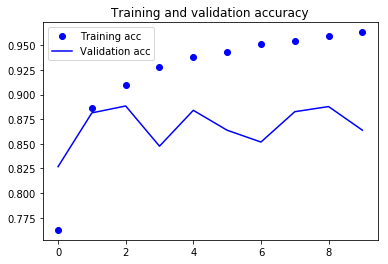

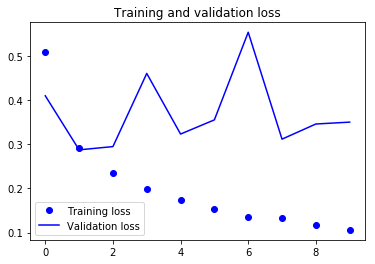

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()